In [14]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from ieeg_dataset import IeegDataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scienceplots
import matplotlib
print(matplotlib.get_configdir())


/home/danielcrovo/.config/matplotlib


In [20]:
plt.style.use(['science', 'ieee'])


In [25]:
plt.style.use(['science','ieee', 'grid', 'std-colors'])



# Dataset Distribution

In [16]:
dataset = IeegDataset('../data/data_normalized_exp2')

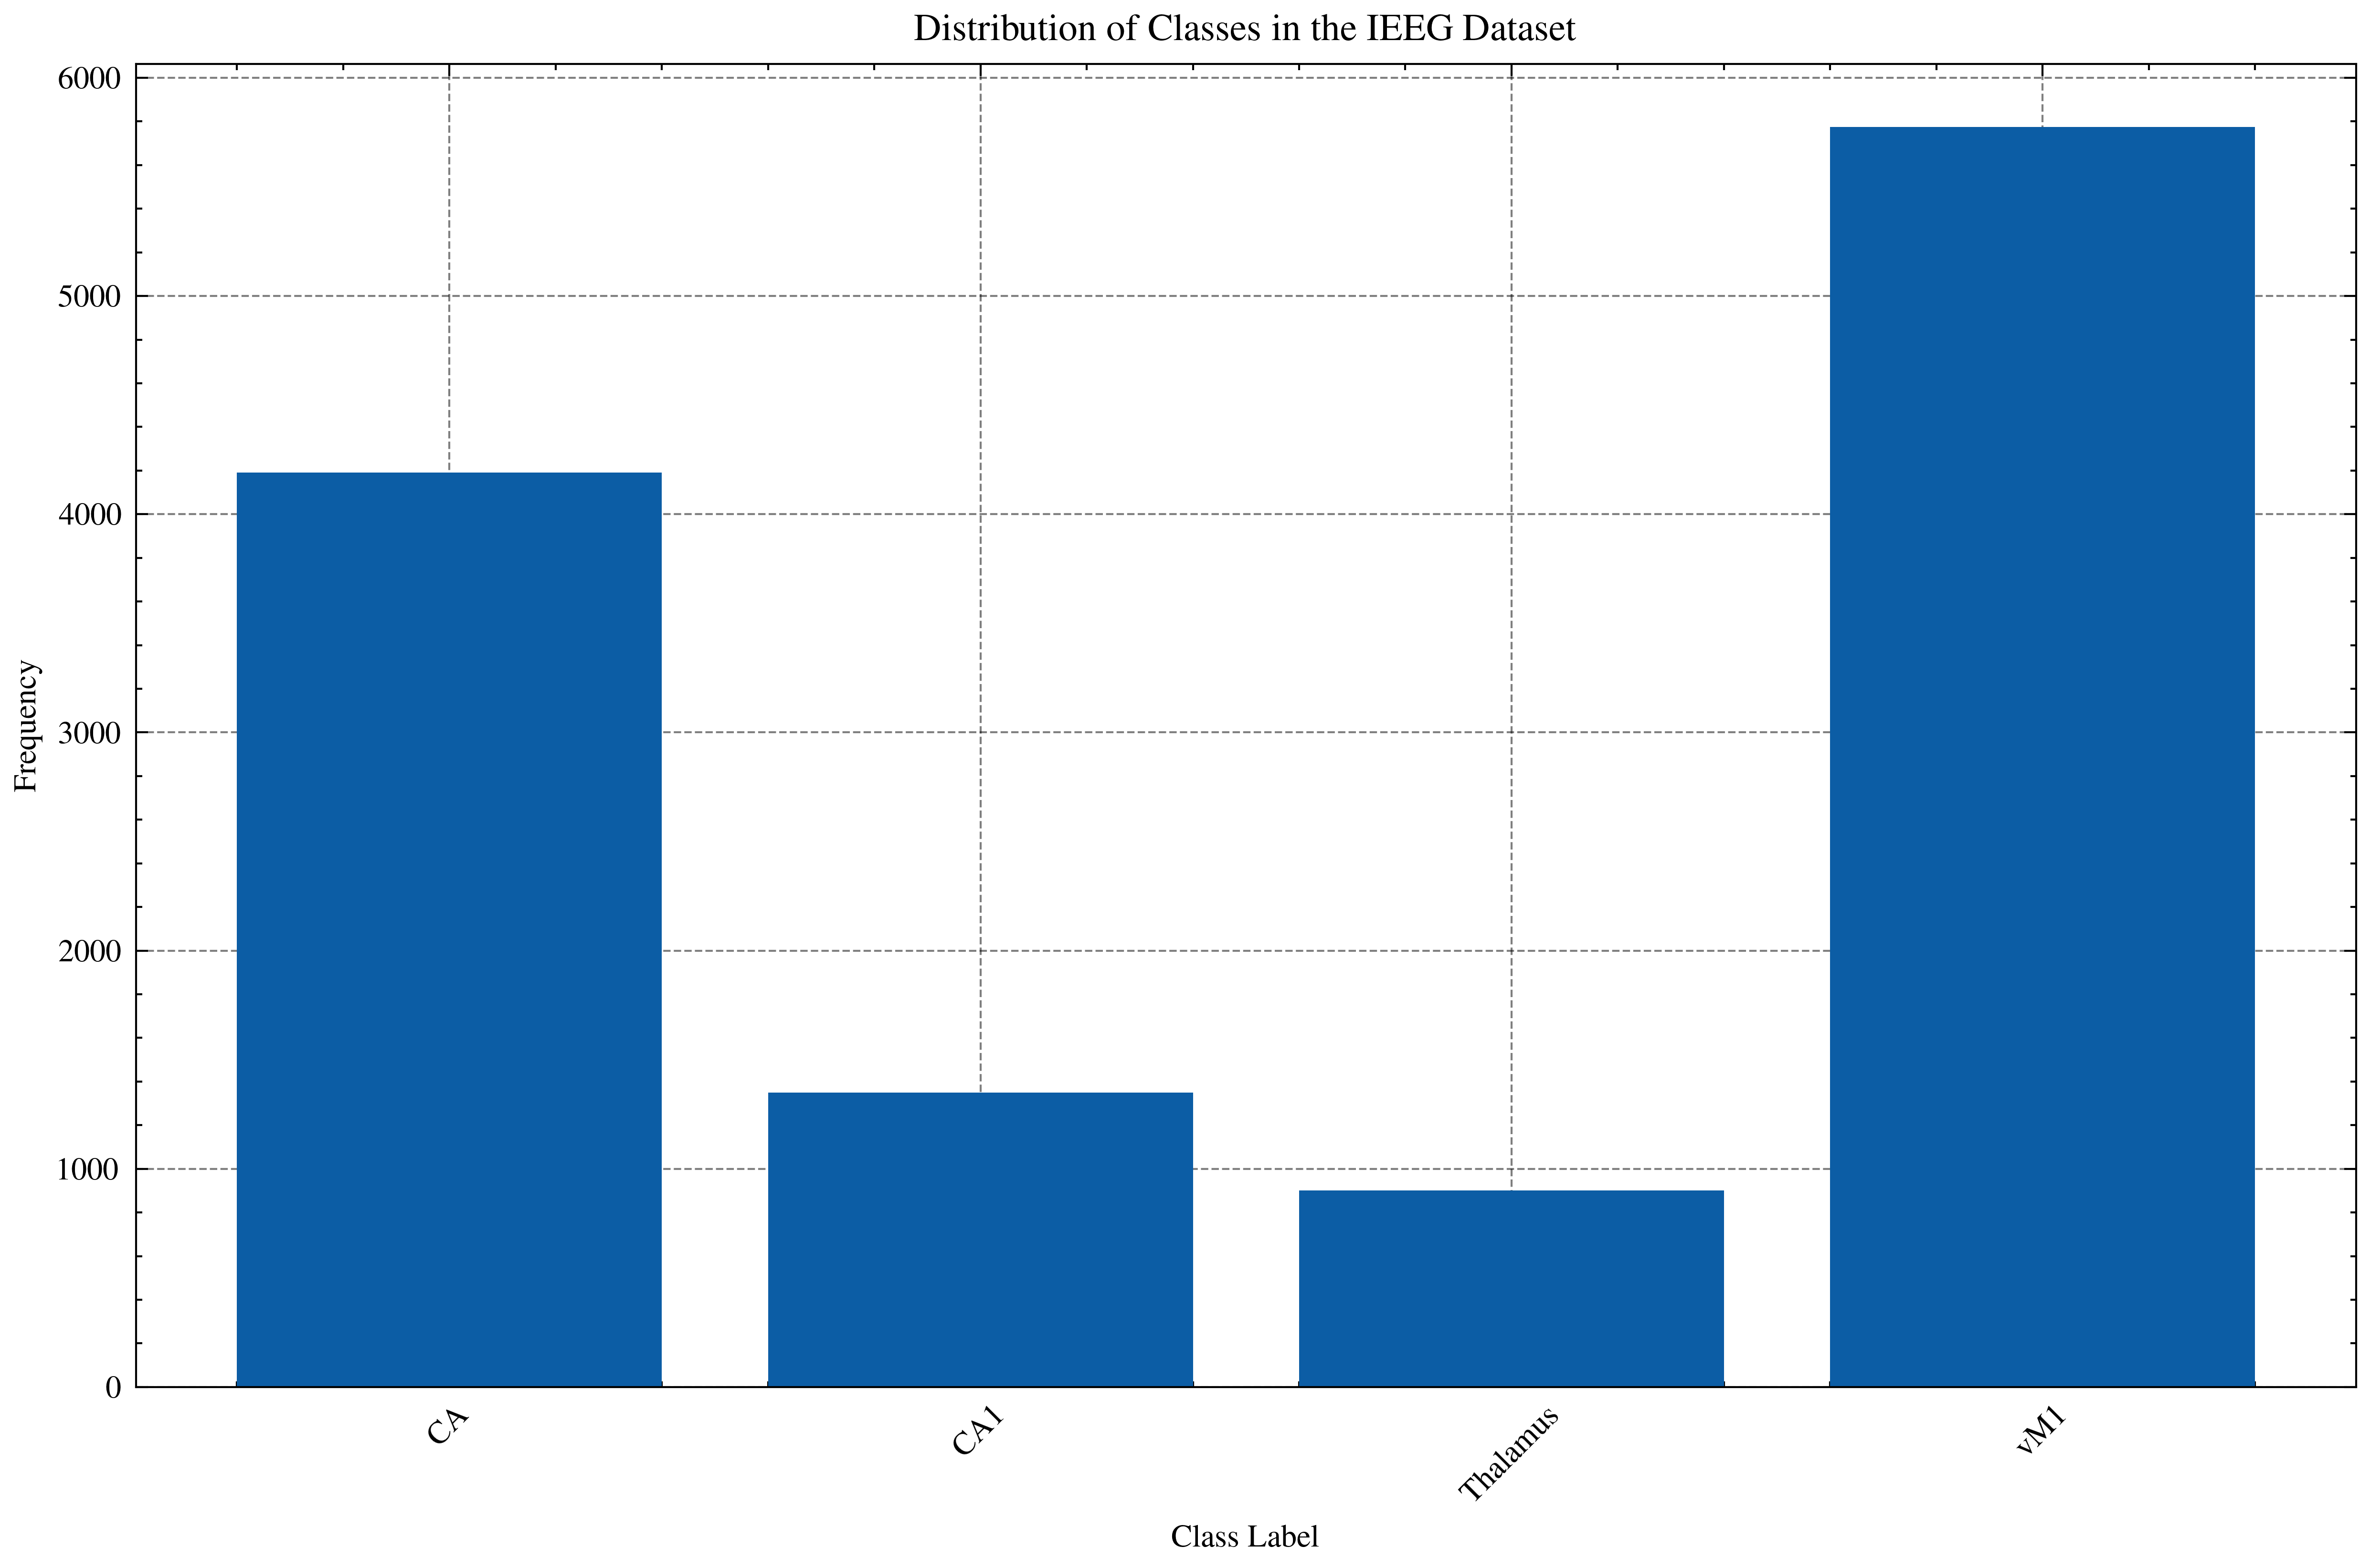

In [28]:
from collections import Counter
# Get the labels from the dataset
# Get the labels from the dataset
labels = dataset.labels.numpy()

# Count the occurrences of each class
label_counts = Counter(labels)

# Get the class mapping
class_mapping = dataset.get_class_mapping()

# Convert numeric labels to class names
class_names = [class_mapping[label] for label in label_counts.keys()]

# Plot the distribution of classes
plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.title('Distribution of Classes in the IEEG Dataset')
plt.xticks(ticks=list(label_counts.keys()), labels=class_names, rotation=45)
plt.savefig('../plots/dataset/dataset_distribution_bar.png')

In [ ]:
# Create pie charts
def plot_pie_chart(counts, class_names, title):
    fig, ax = plt.subplots(figsize=(10, 10), dpi=300)  # Ultra high resolution
    wedges, texts, autotexts = ax.pie(counts, labels=class_names, autopct='%1.1f%%', startangle=90, counterclock=False,
                                      colors=plt.cm.tab20.colors)
    for text in texts + autotexts:
        text.set_fontsize(14)
        text.set_fontweight('bold')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title, fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    return fig

# Baselines

In [4]:

confusion_matrix_ANN = pd.read_csv('../models/results/confusion_matrix_ANN.csv')
val_metrics_ANN_baseline = pd.read_csv('../models/results/val_metrics_ANN_baseline.csv')
train_metrics_ANN_baseline = pd.read_csv('../models/results/train_metrics_ANN_baseline.csv')
confusion_matrix_ANN_with_er = pd.read_csv('../models/results/confusion_matrix_ANN_with_er.csv')
val_metrics_ANN_baseline_wr = pd.read_csv('../models/results/val_metrics_ANN_baseline_wr.csv')
train_metrics_ANN_baseline_wr = pd.read_csv('../models/results/train_metrics_ANN_baseline_wr.csv')

In [ ]:
fig, axes = plt.plot(1, 2, figsize=(20, 8))

sns.heatmap(confusion_matrix_ANN.set_index('Unnamed: 0'), annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])


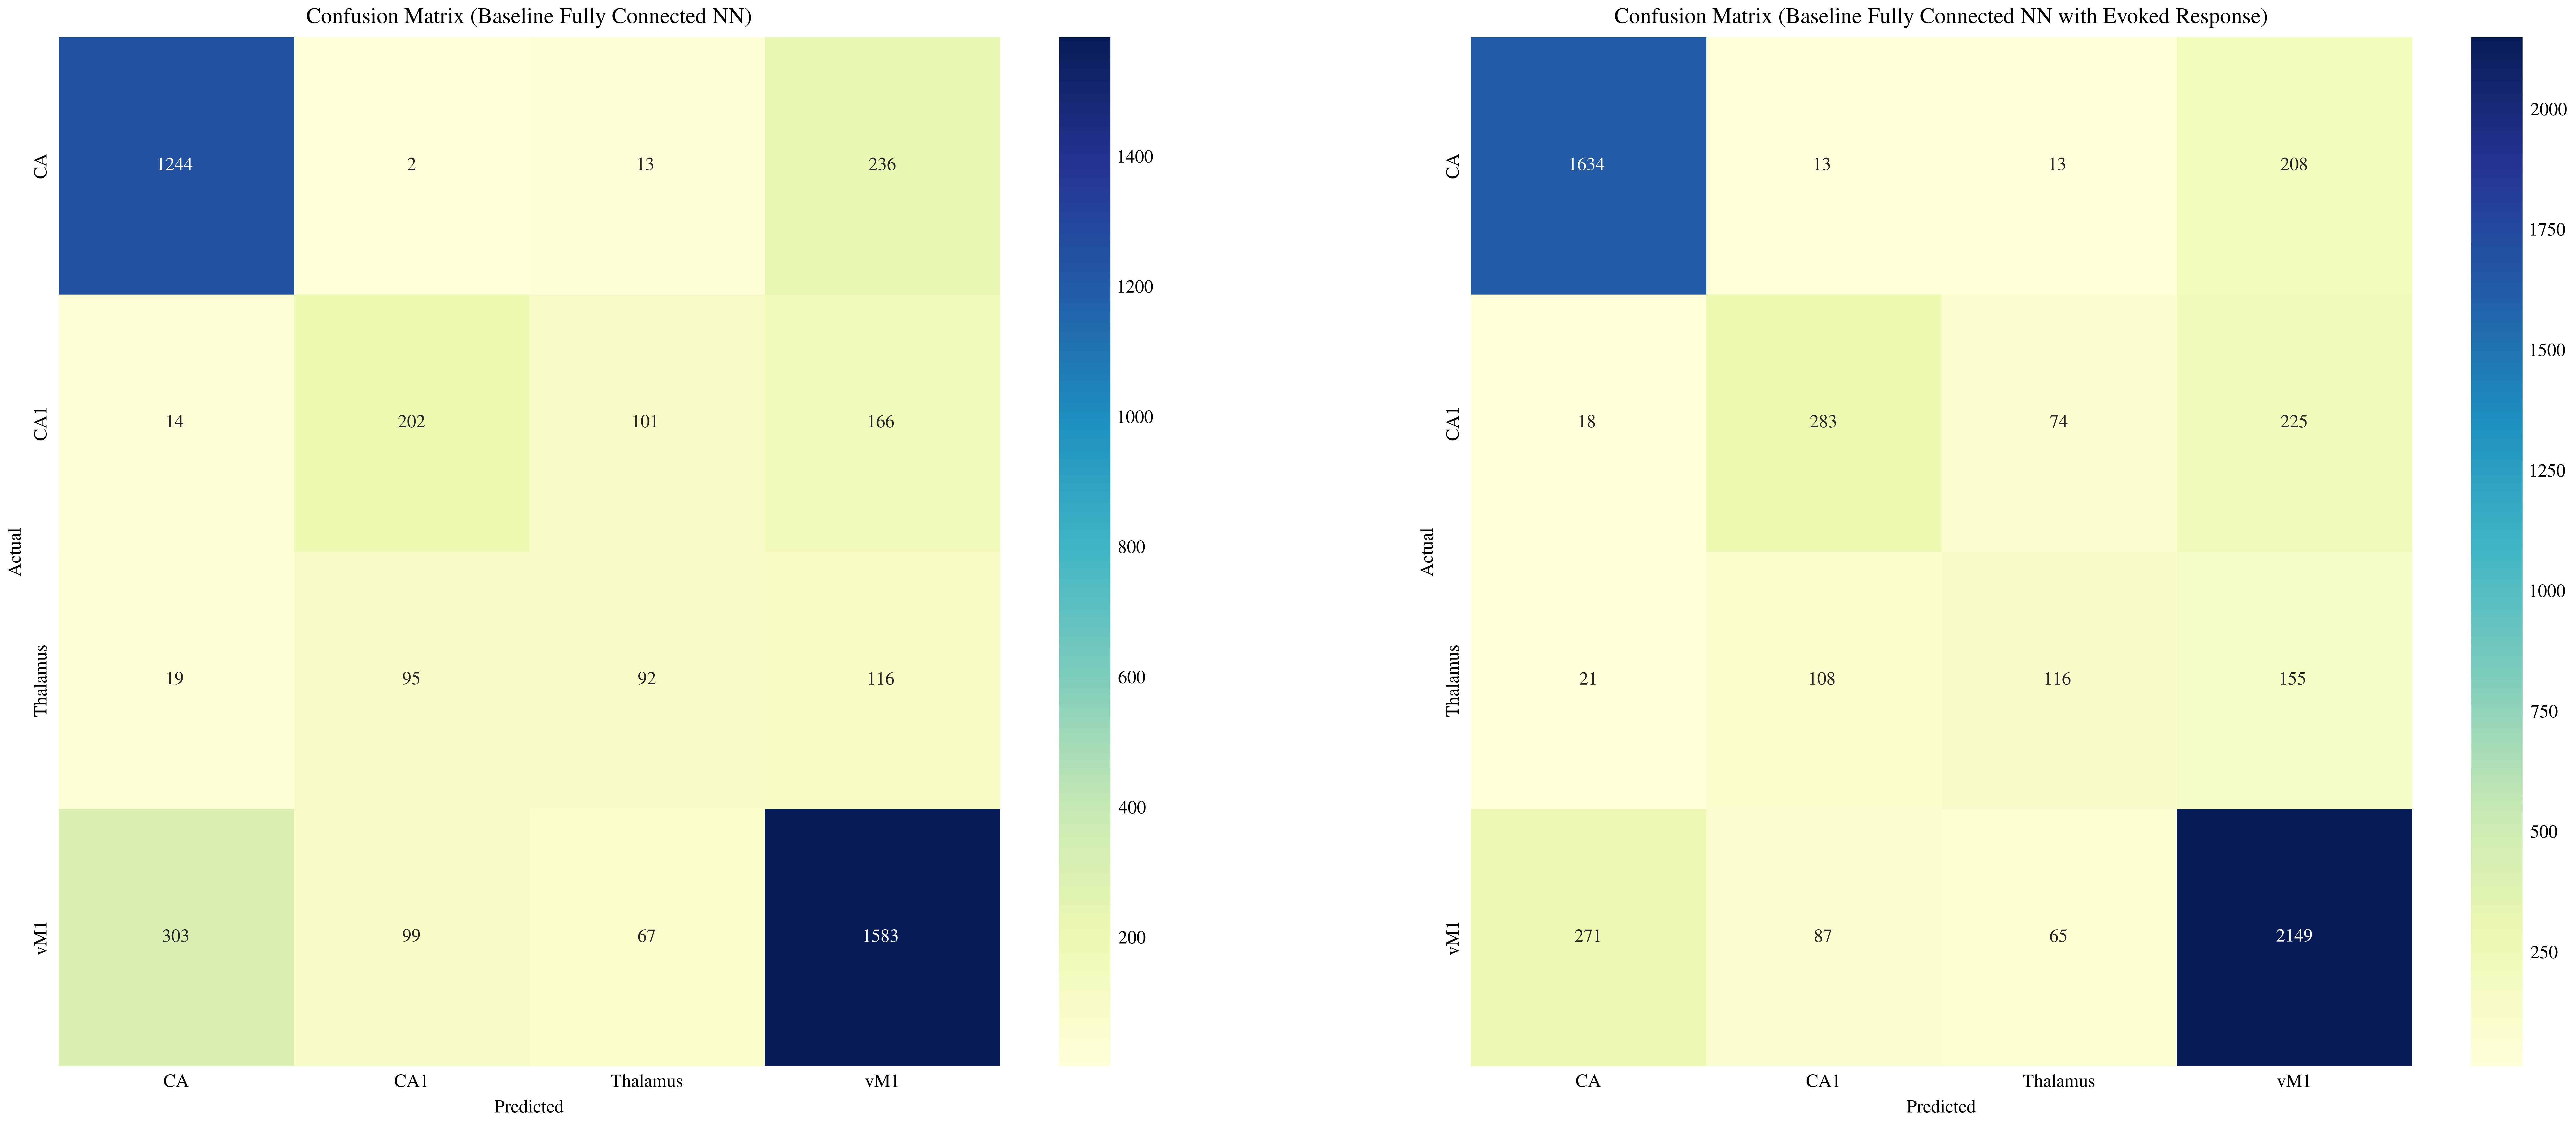

In [12]:


# Plotting a summary of the two models' confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(confusion_matrix_ANN.set_index('Unnamed: 0'), annot=True, fmt="d", cmap="YlGnBu", ax=axes[0])
axes[0].set_title("Confusion Matrix (Baseline Fully Connected NN)")
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

sns.heatmap(confusion_matrix_ANN_with_er.set_index('Unnamed: 0'), annot=True, fmt="d", cmap="YlGnBu", ax=axes[1])
axes[1].set_title("Confusion Matrix (Baseline Fully Connected NN with Evoked Response)")
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

# plt.tight_layout()
plt.show()


In [3]:

## Plotting train and validation loss for all models, and adding validation F1-score with a secondary y-axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Custom colors
color_train_loss_cnn = "#1f77b4"
color_val_loss_cnn = "#ff7f0e"
color_train_loss_lstm = "#2ca02c"
color_val_loss_lstm = "#d62728"
color_f1_score = "#9467bd"

# Train and Validation Loss for ANN
ax1.plot(train_metrics_ANN_baseline['epoch'], train_metrics_ANN_baseline['train_loss'], color=color_train_loss_cnn, marker='o', label='Train Loss (ANN)')
ax1.plot(val_metrics_ANN_baseline['epoch'], val_metrics_ANN_baseline['val_loss'], color=color_val_loss_cnn, linestyle='--', marker='o', label='Validation Loss (ANN)')

# Train and Validation Loss for ANN with ER
ax1.plot(train_metrics_ANN_baseline_wr['epoch'], train_metrics_ANN_baseline_wr['train_loss'], color=color_train_loss_lstm, marker='o', label='Train Loss (ANN with ER)')
ax1.plot(val_metrics_ANN_baseline_wr['epoch'], val_metrics_ANN_baseline_wr['val_loss'], color=color_val_loss_lstm, linestyle='--', marker='o', label='Validation Loss (ANN with ER)')

# Axis labels and titles for loss
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Train and Validation Loss for All Models')
ax1.legend(loc='upper right')
ax1.grid(True)

# Validation F1 Score for ANN and ANN with ER
ax2.plot(val_metrics_ANN_baseline['epoch'], val_metrics_ANN_baseline['val_f1'], color=color_f1_score, linestyle='-', marker='x', label='Validation F1 Score (ANN)', alpha=0.6)
ax2.plot(val_metrics_ANN_baseline_wr['epoch'], val_metrics_ANN_baseline_wr['val_f1'], color=color_f1_score, linestyle='--', marker='x', label='Validation F1 Score (ANN with ER)', alpha=0.6)

# Axis labels and titles for F1 score
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Validation F1 Score')
ax2.set_title('Validation F1 Score for All Models')
ax2.legend(loc='upper right')
ax2.grid(True)

plt.tight_layout()
plt.show()

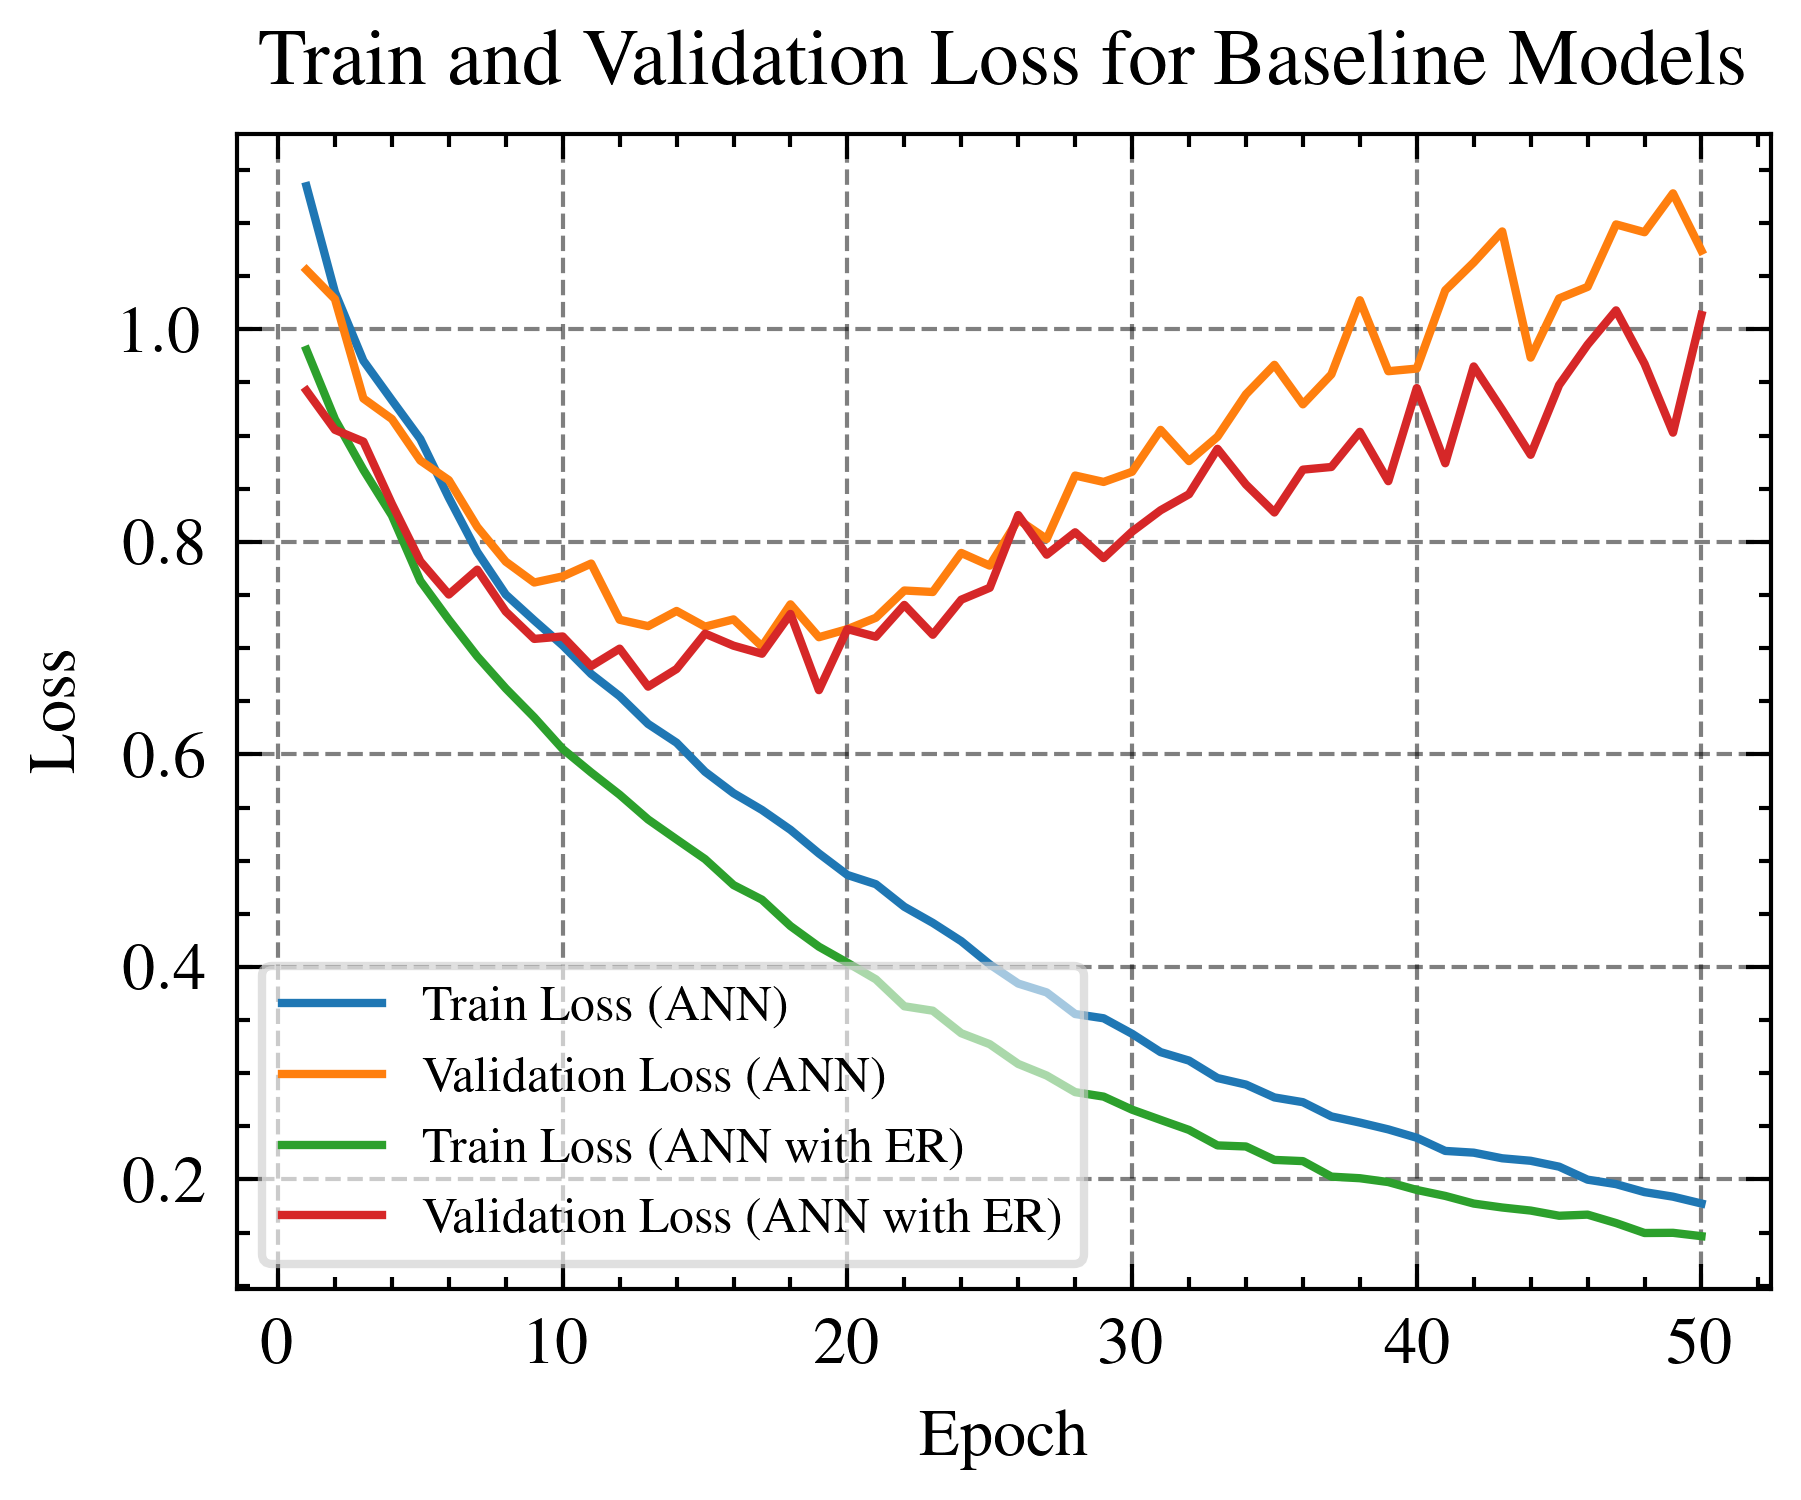

In [33]:

# Custom colors
color_train_loss_cnn = "#1f77b4"
color_val_loss_cnn = "#ff7f0e"
color_train_loss_lstm = "#2ca02c"
color_val_loss_lstm = "#d62728"

# Create the main plot
# plt.figure(figsize=(14, 8))

# Train and Validation Loss for ANN
plt.plot(train_metrics_ANN_baseline['epoch'], 
         train_metrics_ANN_baseline['train_loss'], 
         color=color_train_loss_cnn, label='Train Loss (ANN)',
         linestyle='-')
plt.plot(val_metrics_ANN_baseline['epoch'], 
         val_metrics_ANN_baseline['val_loss'], 
         color=color_val_loss_cnn, 
         linestyle='-', label='Validation Loss (ANN)')

# Train and Validation Loss for ANN with ER
plt.plot(train_metrics_ANN_baseline_wr['epoch'], 
         train_metrics_ANN_baseline_wr['train_loss'], 
         color=color_train_loss_lstm, 
         label='Train Loss (ANN with ER)',
         linestyle='-')
plt.plot(val_metrics_ANN_baseline_wr['epoch'], 
         val_metrics_ANN_baseline_wr['val_loss'], 
         color=color_val_loss_lstm, 
         linestyle='-', label='Validation Loss (ANN with ER)')

# Axis labels and titles
plt.xlabel('Epoch')
plt.ylabel('Loss', color='k')
plt.title('Train and Validation Loss for Baseline Models')

# Legends
plt.legend(loc='lower left',frameon=True, fontsize=6, framealpha=0.6)
# Adding grid
# plt.grid(True)

# plt.tight_layout()
plt.savefig('../plots/results/results_train_val_loss_baseline.png')
# plt.show()

In [30]:

confusion_matrix_P_CNN_LSTM = pd.read_csv('../models/results/confusion_matrix_CNN.csv')
val_metrics_P_CNN_LSTM = pd.read_csv('../models/results/val_metrics_CNN.csv')
train_metrics_P_CNN_LSTM = pd.read_csv('../models/results/train_metrics_CNN.csv')
confusion_matrix_CNN_TNN = pd.read_csv('../models/results/confusion_matrix_run_LSTM_2000.csv')
val_metrics_CNN_TNN = pd.read_csv('../models/results/val_metrics_LSTM_2000.csv')
train_metrics_CNN_TNN = pd.read_csv('../models/results/train_metrics_LSTM_2000.csv')

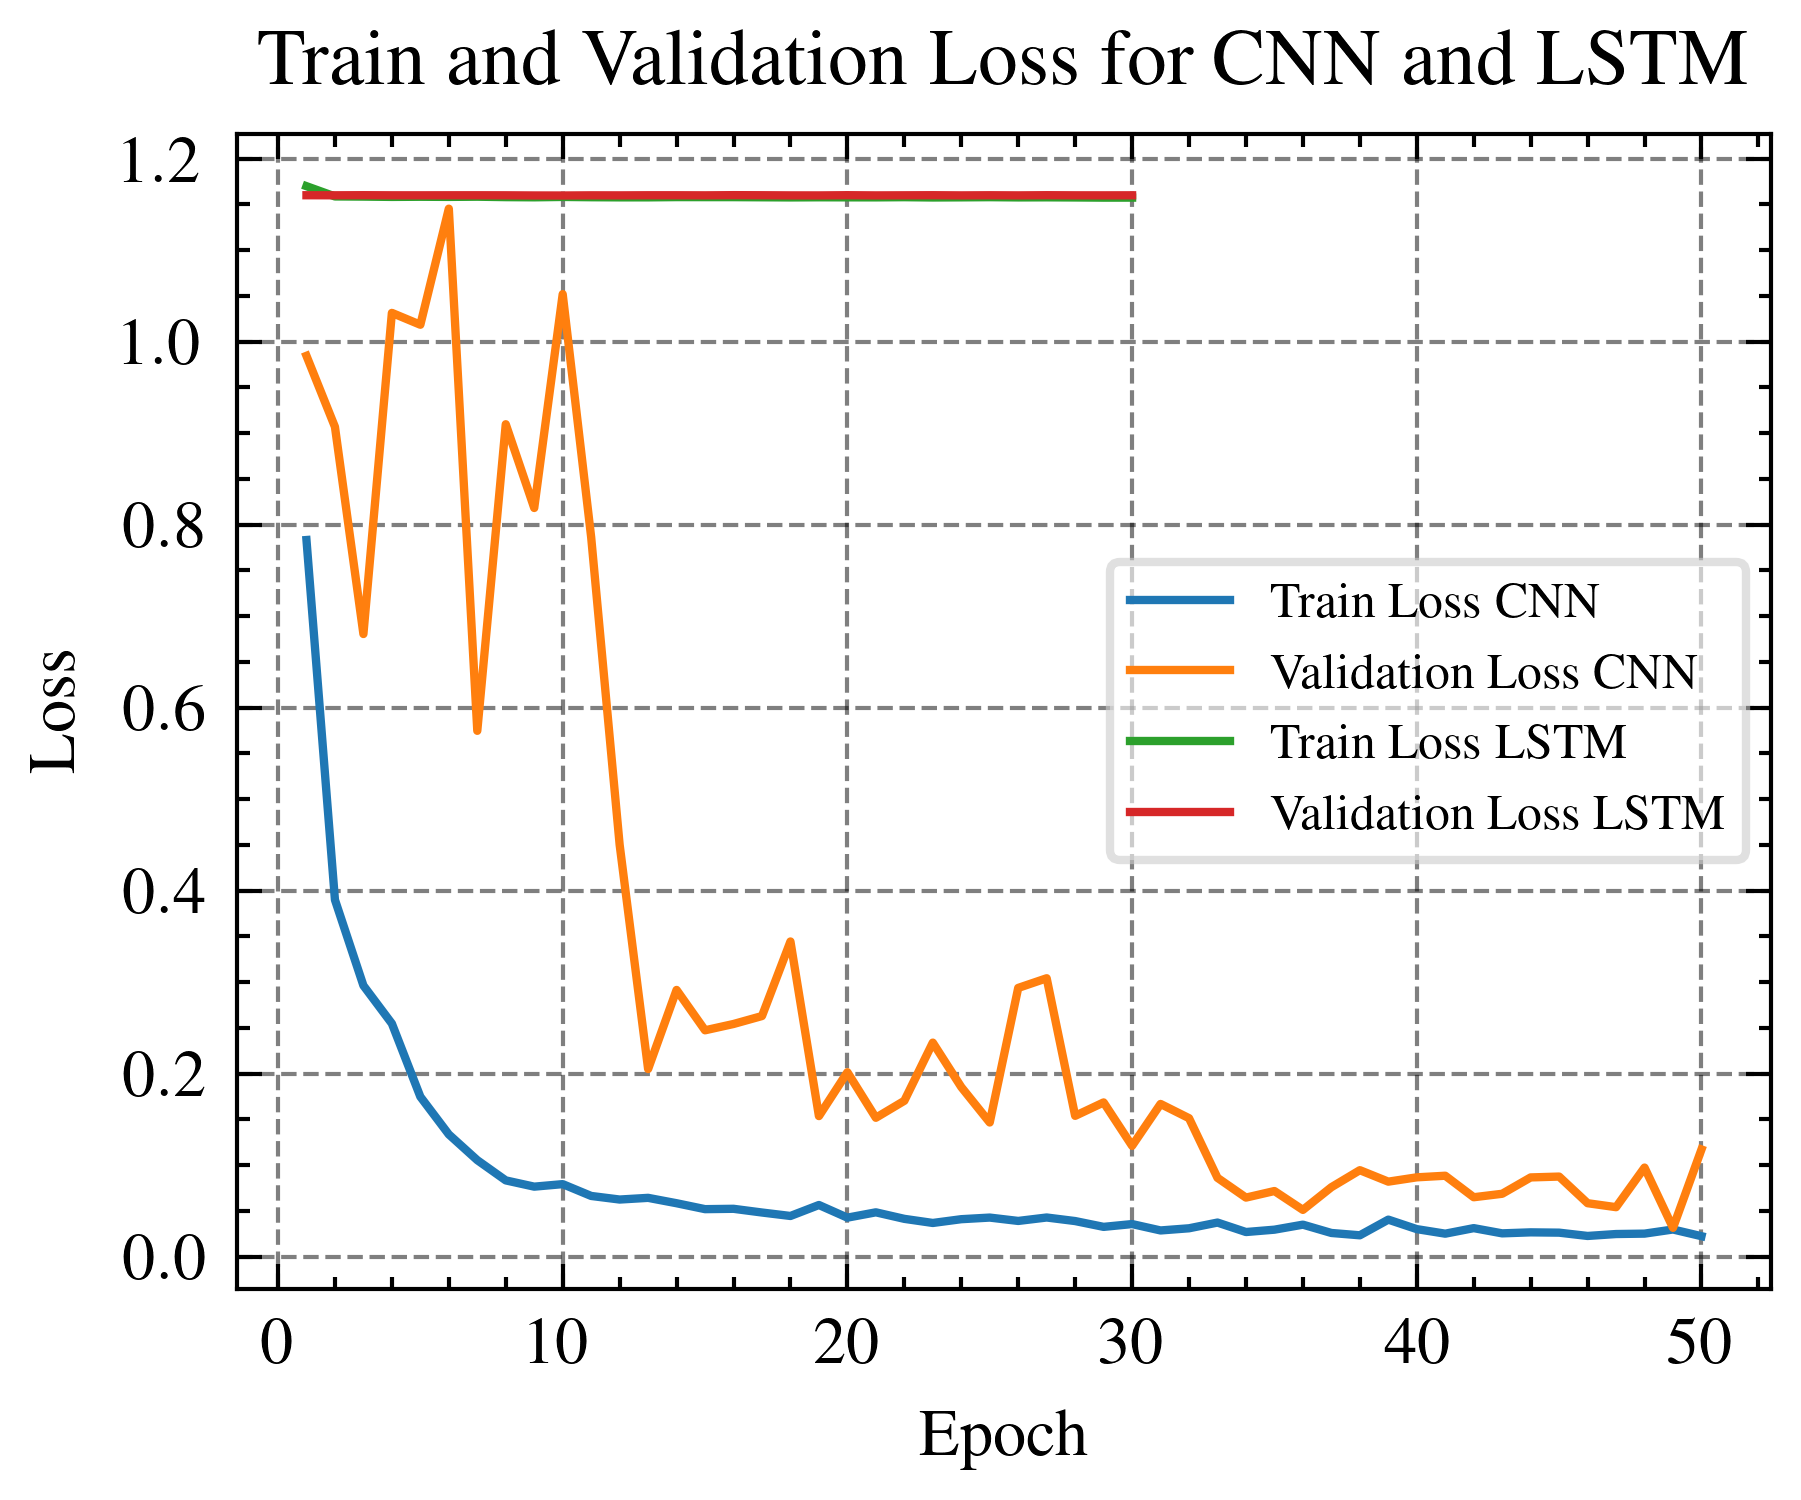

In [44]:
# Custom colors
color_train_loss_cnn = "#1f77b4"
color_val_loss_cnn = "#ff7f0e"
color_train_loss_lstm = "#2ca02c"
color_val_loss_lstm = "#d62728"

# Create the main plot
# plt.figure(figsize=(14, 8))

# Train and Validation Loss for ANN
plt.plot(train_metrics_P_CNN_LSTM['epoch'], 
         train_metrics_P_CNN_LSTM['train_loss'], 
         color=color_train_loss_cnn, label='Train Loss CNN',
         linestyle='-')
plt.plot(val_metrics_P_CNN_LSTM['epoch'], 
         val_metrics_P_CNN_LSTM['val_loss'], 
         color=color_val_loss_cnn, 
         linestyle='-', label='Validation Loss CNN')

# Train and Validation Loss for ANN with ER
plt.plot(train_metrics_CNN_TNN['epoch'], 
         train_metrics_CNN_TNN['train_loss'], 
         color=color_train_loss_lstm, 
         label='Train Loss LSTM',
         linestyle='-')
plt.plot(val_metrics_CNN_TNN['epoch'], 
         val_metrics_CNN_TNN['val_loss'], 
         color=color_val_loss_lstm, 
         linestyle='-', label='Validation Loss LSTM')

# Axis labels and titles
plt.xlabel('Epoch')
plt.ylabel('Loss', color='k')
plt.title('Train and Validation Loss for CNN and LSTM')

# Legends
plt.legend(loc='best',frameon=True, fontsize=6, framealpha=0.6)
# Adding grid
# plt.grid(True)

# plt.tight_layout()
plt.savefig('../plots/results/results_train_val_loss_CNN_LSTM.png')
# plt.show()

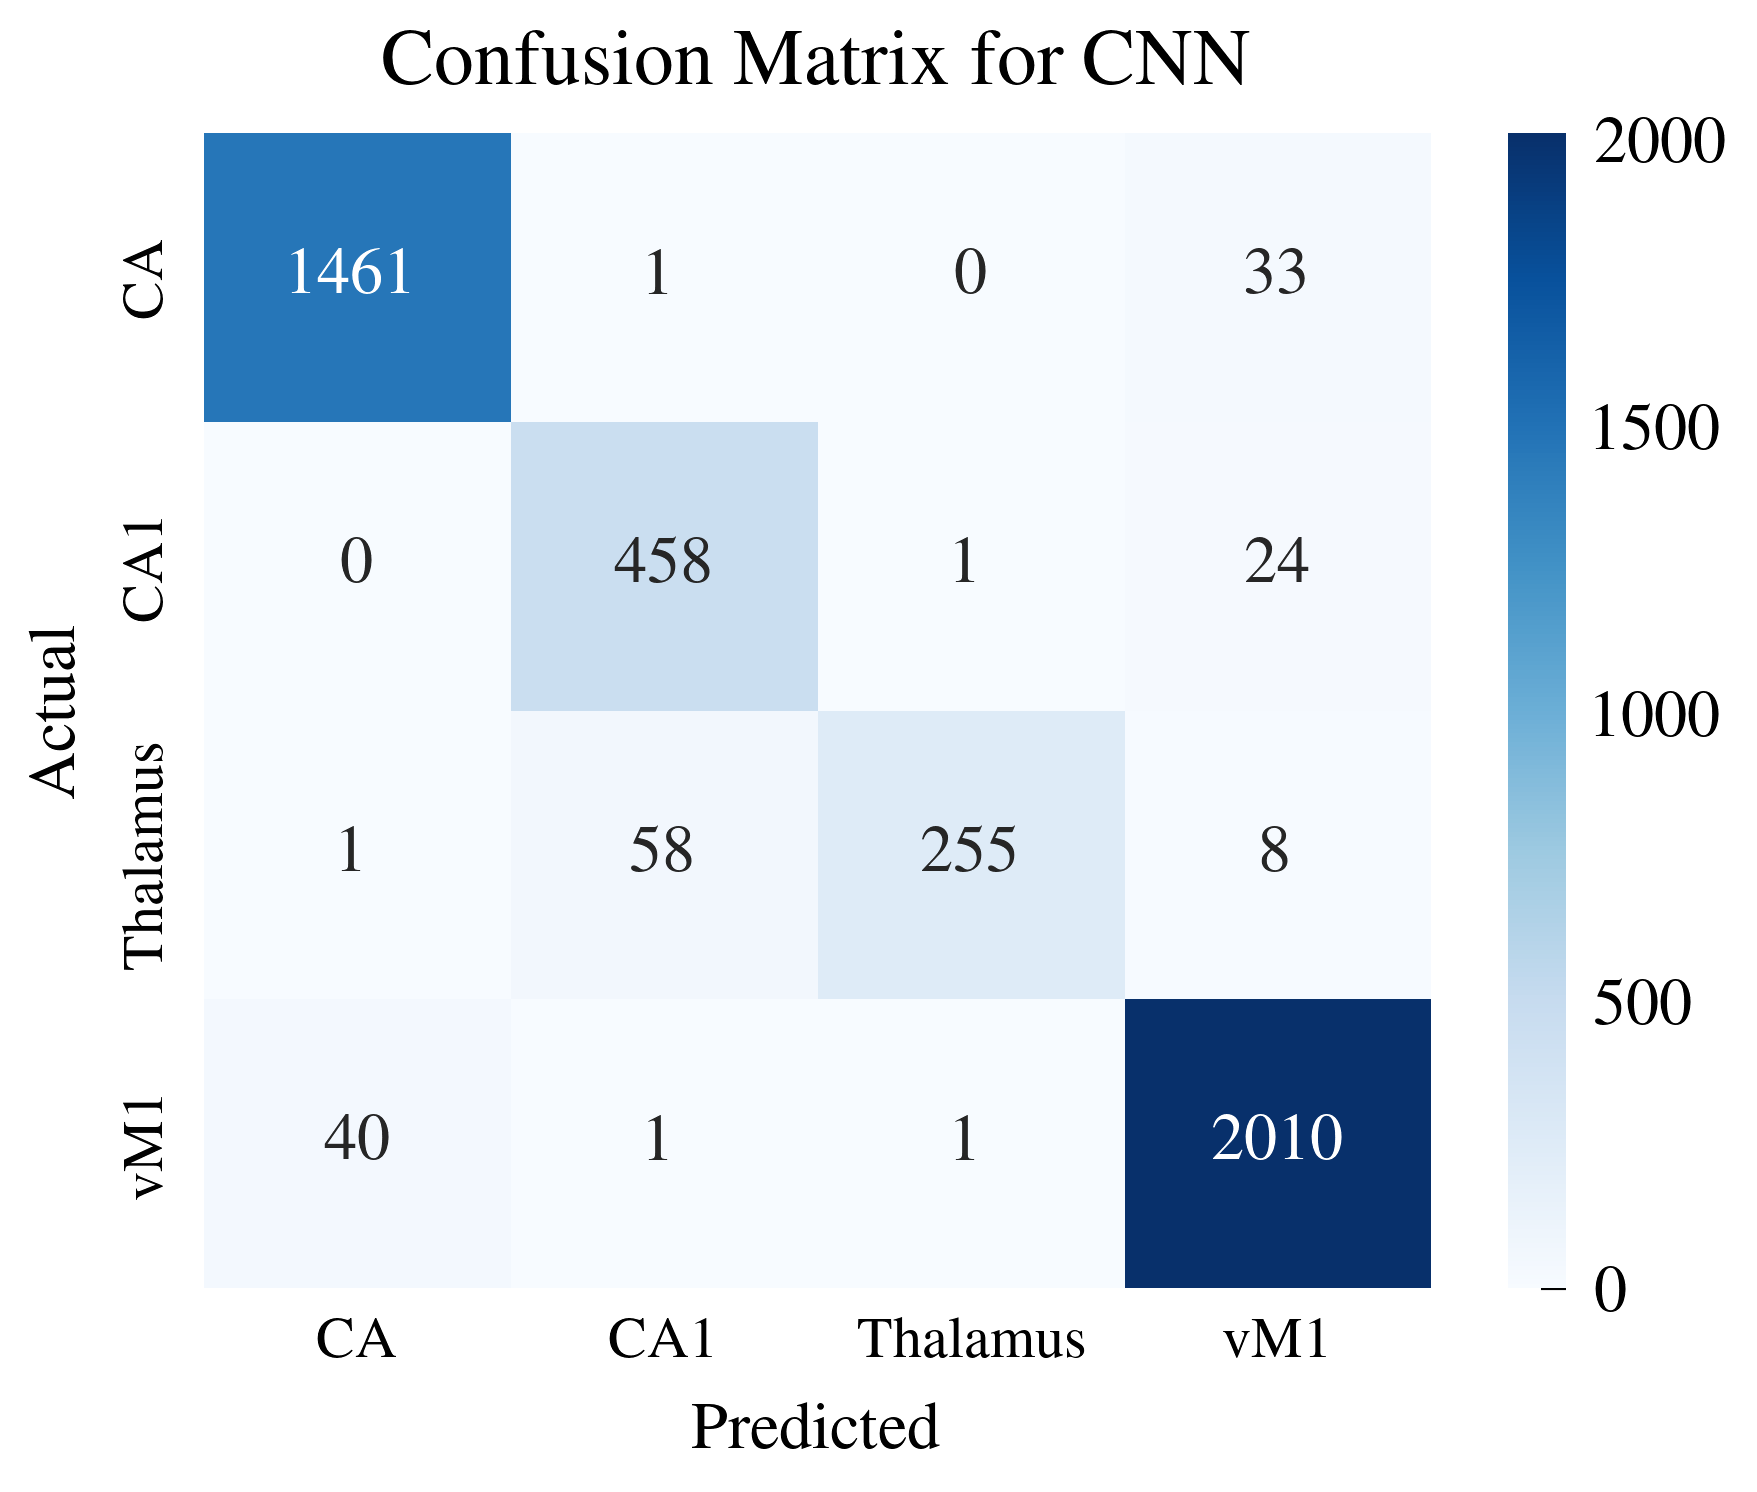

In [42]:
# Extract the data
confusion_matrix = confusion_matrix_P_CNN_LSTM.drop('Unnamed: 0', axis=1).values
labels = confusion_matrix_P_CNN_LSTM['Unnamed: 0'].values
plt.figure()
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.savefig('../plots/results/confusion_matrix_cnn.png')


# Hybrid Models

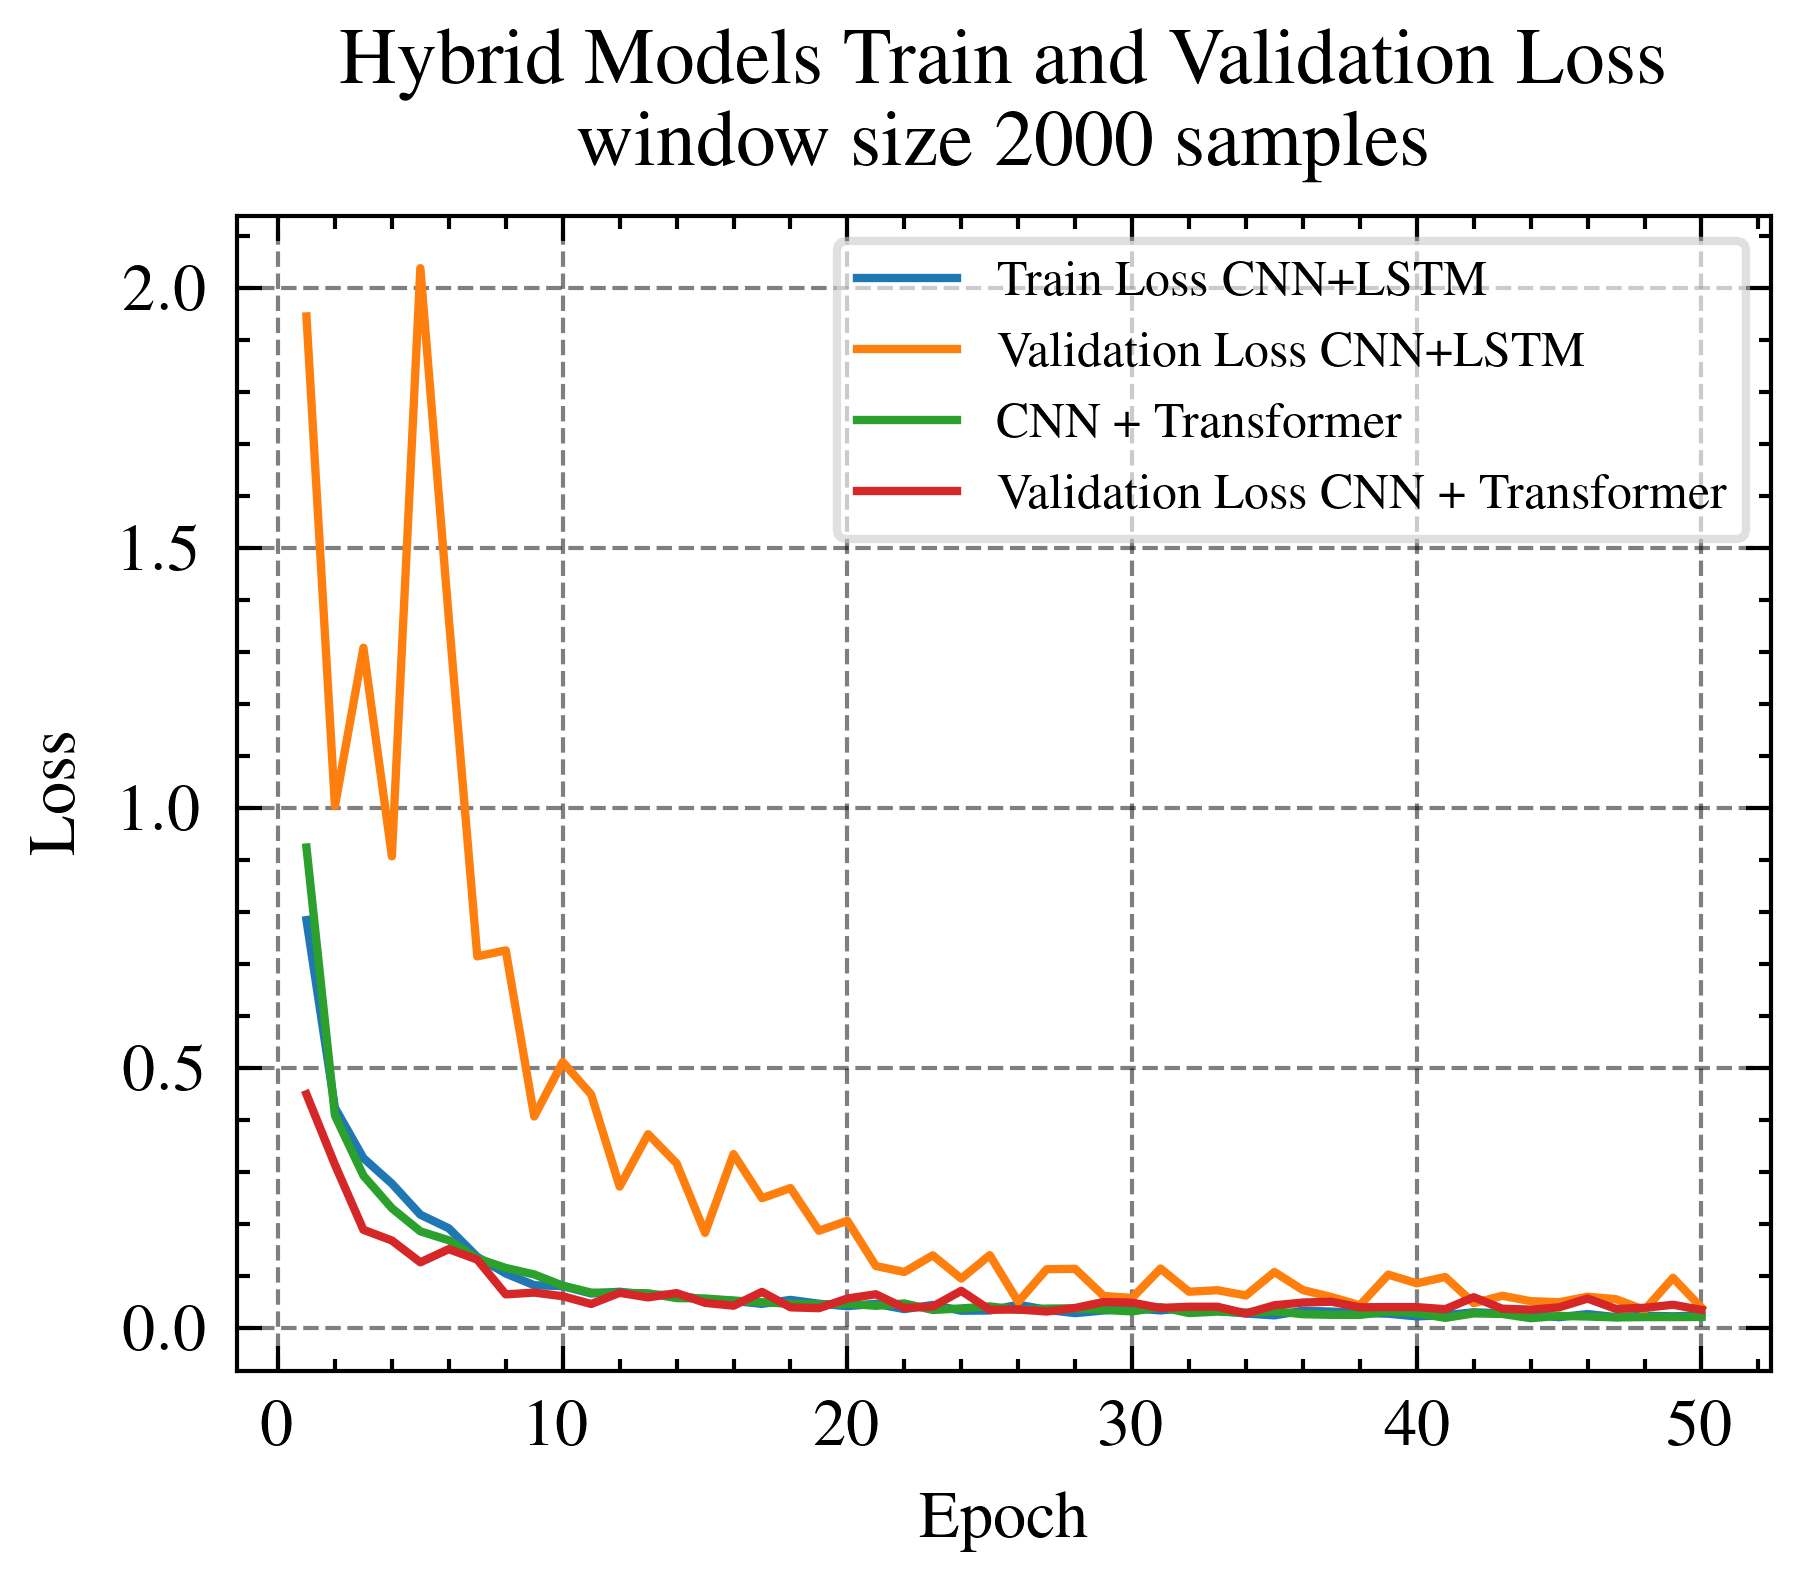

In [51]:

confusion_matrix_P_CNN_LSTM = pd.read_csv('../models/results/confusion_matrix_P_CNN_LSTM_Experiment_sl2000.csv')
val_metrics_P_CNN_LSTM = pd.read_csv('../models/results/val_metrics_P_CNN_LSTM.csv')
train_metrics_P_CNN_LSTM = pd.read_csv('../models/results/train_metrics_P_CNN_LSTM.csv')
confusion_matrix_CNN_TNN = pd.read_csv('../models/results/confusion_matrix_run_CNN_TNN.csv')
val_metrics_CNN_TNN = pd.read_csv('../models/results/val_metrics_CNN_TNN.csv')
train_metrics_CNN_TNN = pd.read_csv('../models/results/train_metrics_CNN_TNN.csv')




# Custom colors
color_train_loss_cnn = "#1f77b4"
color_val_loss_cnn = "#ff7f0e"
color_train_loss_lstm = "#2ca02c"
color_val_loss_lstm = "#d62728"

# Create the main plot
# plt.figure(figsize=(14, 8))

# Train and Validation Loss for ANN
plt.plot(train_metrics_P_CNN_LSTM['epoch'], 
         train_metrics_P_CNN_LSTM['train_loss'], 
         color=color_train_loss_cnn, label='Train Loss CNN+LSTM',
         linestyle='-')
plt.plot(val_metrics_P_CNN_LSTM['epoch'], 
         val_metrics_P_CNN_LSTM['val_loss'], 
         color=color_val_loss_cnn, 
         linestyle='-', label='Validation Loss CNN+LSTM')

# Train and Validation Loss for ANN with ER
plt.plot(train_metrics_CNN_TNN['epoch'], 
         train_metrics_CNN_TNN['train_loss'], 
         color=color_train_loss_lstm, 
         label='CNN + Transformer',
         linestyle='-')
plt.plot(val_metrics_CNN_TNN['epoch'], 
         val_metrics_CNN_TNN['val_loss'], 
         color=color_val_loss_lstm, 
         linestyle='-', label='Validation Loss CNN + Transformer')

# Axis labels and titles
plt.xlabel('Epoch')
plt.ylabel('Loss', color='k')
plt.title('Hybrid Models Train and Validation Loss\n window size 2000 samples')

# Legends
plt.legend(loc='best',frameon=True, fontsize=6, framealpha=0.6)
# Adding grid
# plt.grid(True)

# plt.tight_layout()
plt.savefig('../plots/results/results_train_val_loss_hybrid_models_sl2000.png')
# plt.show()

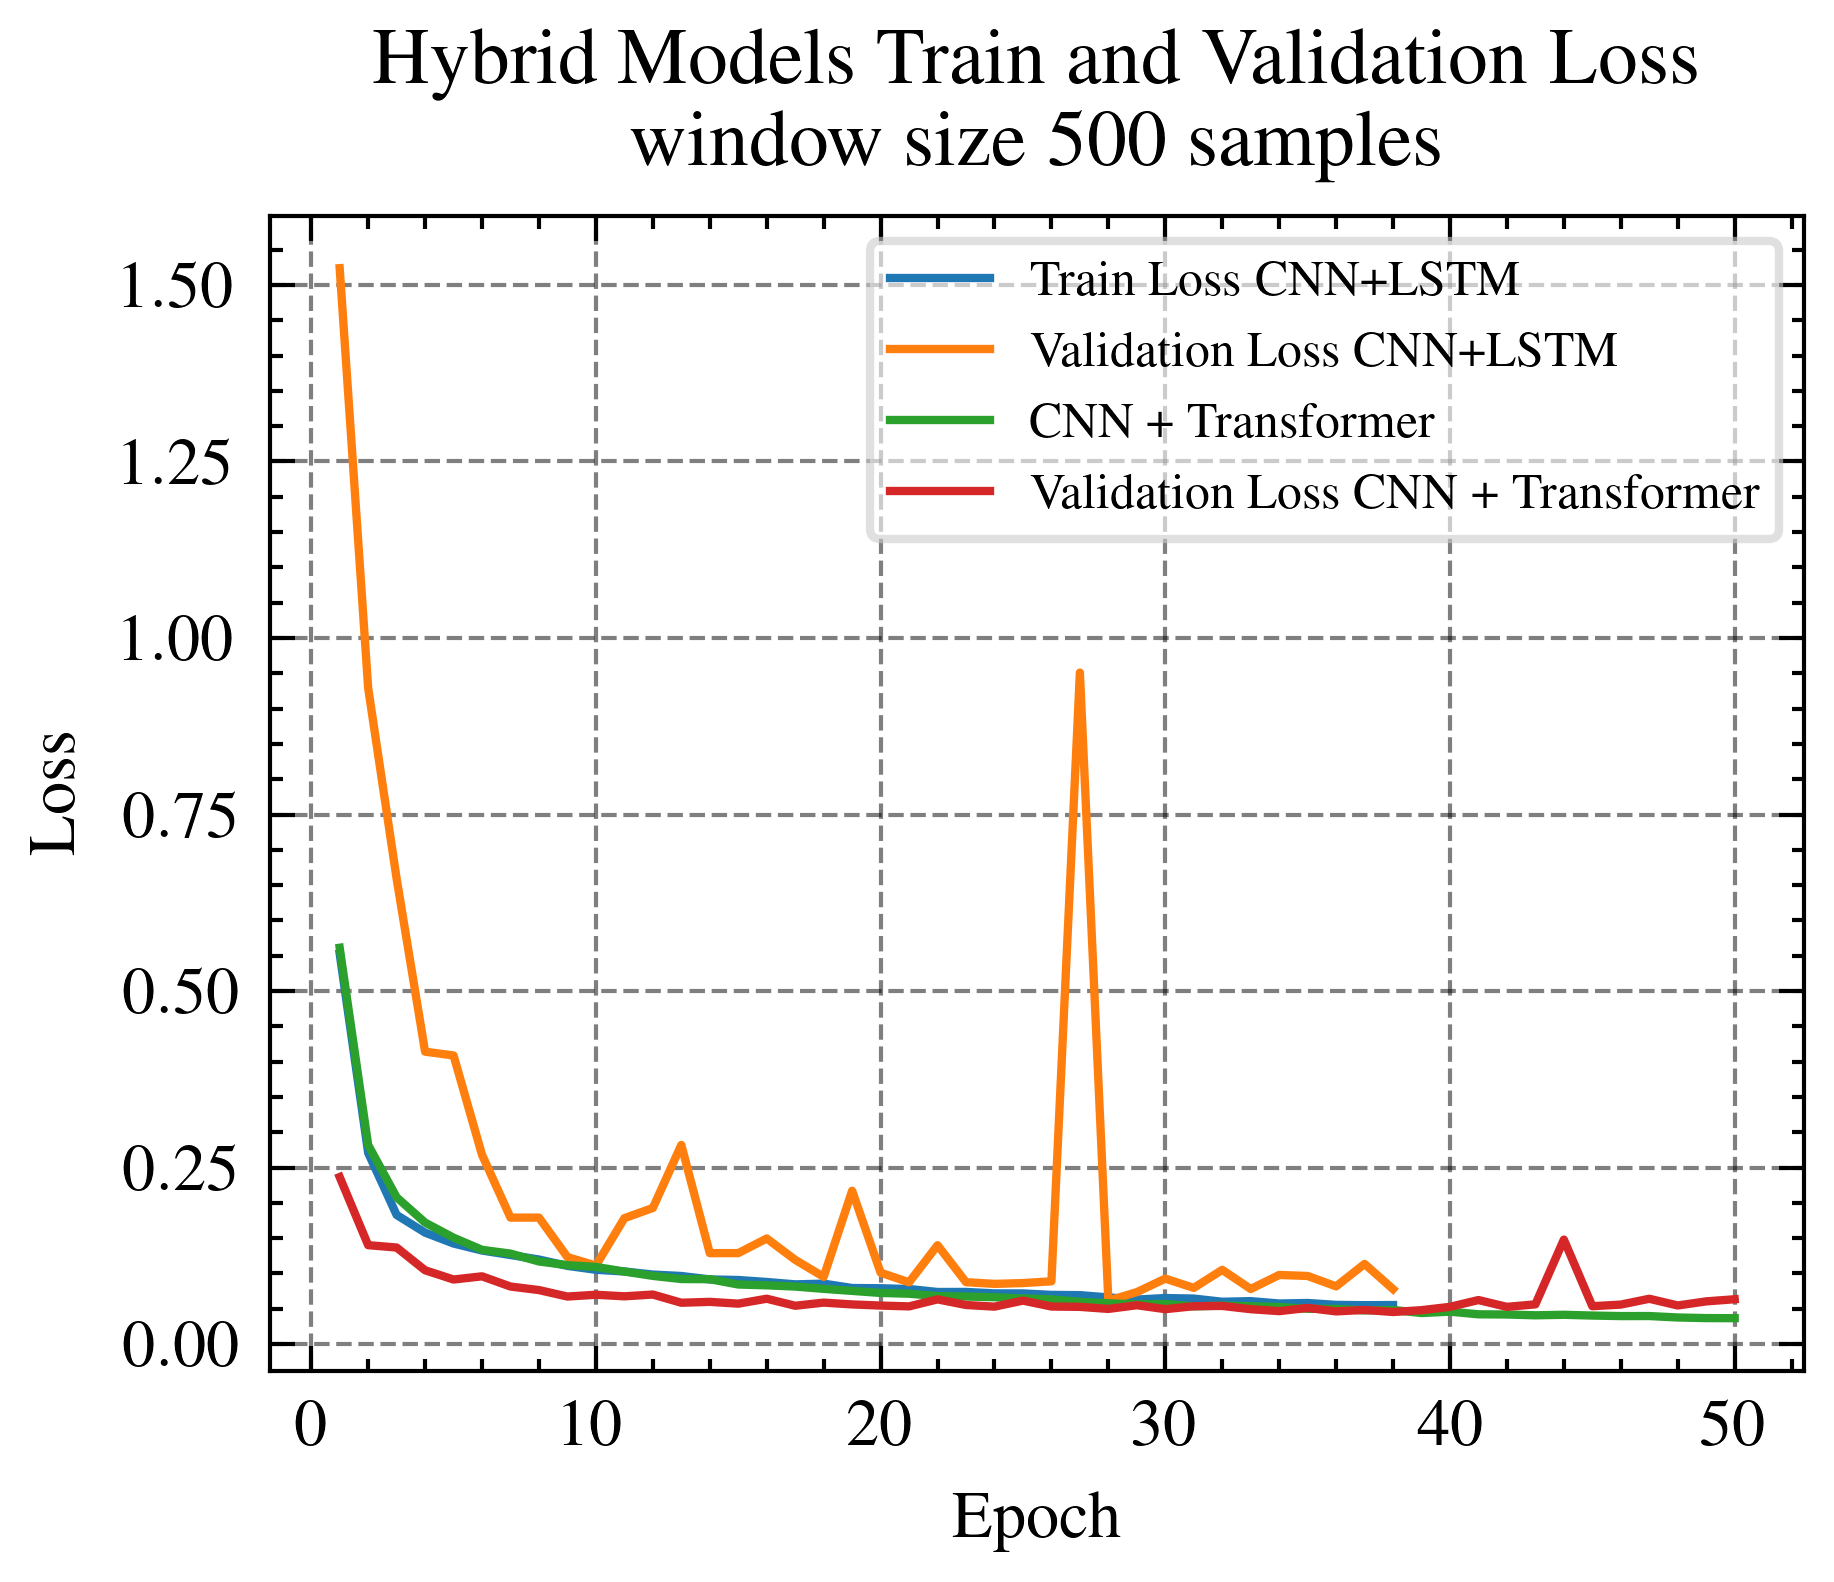

In [53]:
confusion_matrix_P_CNN_LSTM = pd.read_csv('../models/results/confusion_matrix_P_CNN_LSTM_Experiment_sl500.csv')
val_metrics_P_CNN_LSTM = pd.read_csv('../models/results/val_metrics_P_CNN_LSTM_sl500.csv')
train_metrics_P_CNN_LSTM = pd.read_csv('../models/results/train_metrics_P_CNN_LSTM_sl500.csv')
confusion_matrix_CNN_TNN = pd.read_csv('../models/results/confusion_matrix_run_CNN_TNN_sl500.csv')
val_metrics_CNN_TNN = pd.read_csv('../models/results/val_metrics_CNN_TNN_sl500.csv')
train_metrics_CNN_TNN = pd.read_csv('../models/results/train_metrics_CNN_TNN_sl500.csv')




# Custom colors
color_train_loss_cnn = "#1f77b4"
color_val_loss_cnn = "#ff7f0e"
color_train_loss_lstm = "#2ca02c"
color_val_loss_lstm = "#d62728"

# Create the main plot
# plt.figure(figsize=(14, 8))

# Train and Validation Loss for ANN
plt.plot(train_metrics_P_CNN_LSTM['epoch'], 
         train_metrics_P_CNN_LSTM['train_loss'], 
         color=color_train_loss_cnn, label='Train Loss CNN+LSTM',
         linestyle='-')
plt.plot(val_metrics_P_CNN_LSTM['epoch'], 
         val_metrics_P_CNN_LSTM['val_loss'], 
         color=color_val_loss_cnn, 
         linestyle='-', label='Validation Loss CNN+LSTM')

# Train and Validation Loss for ANN with ER
plt.plot(train_metrics_CNN_TNN['epoch'], 
         train_metrics_CNN_TNN['train_loss'], 
         color=color_train_loss_lstm, 
         label='CNN + Transformer',
         linestyle='-')
plt.plot(val_metrics_CNN_TNN['epoch'], 
         val_metrics_CNN_TNN['val_loss'], 
         color=color_val_loss_lstm, 
         linestyle='-', label='Validation Loss CNN + Transformer')

# Axis labels and titles
plt.xlabel('Epoch')
plt.ylabel('Loss', color='k')
plt.title('Hybrid Models Train and Validation Loss\n window size 500 samples')

# Legends
plt.legend(loc='best',frameon=True, fontsize=6, framealpha=0.6)
# Adding grid
# plt.grid(True)

# plt.tight_layout()
plt.savefig('../plots/results/results_train_val_loss_hybrid_models_sl500.png')
# plt.show()

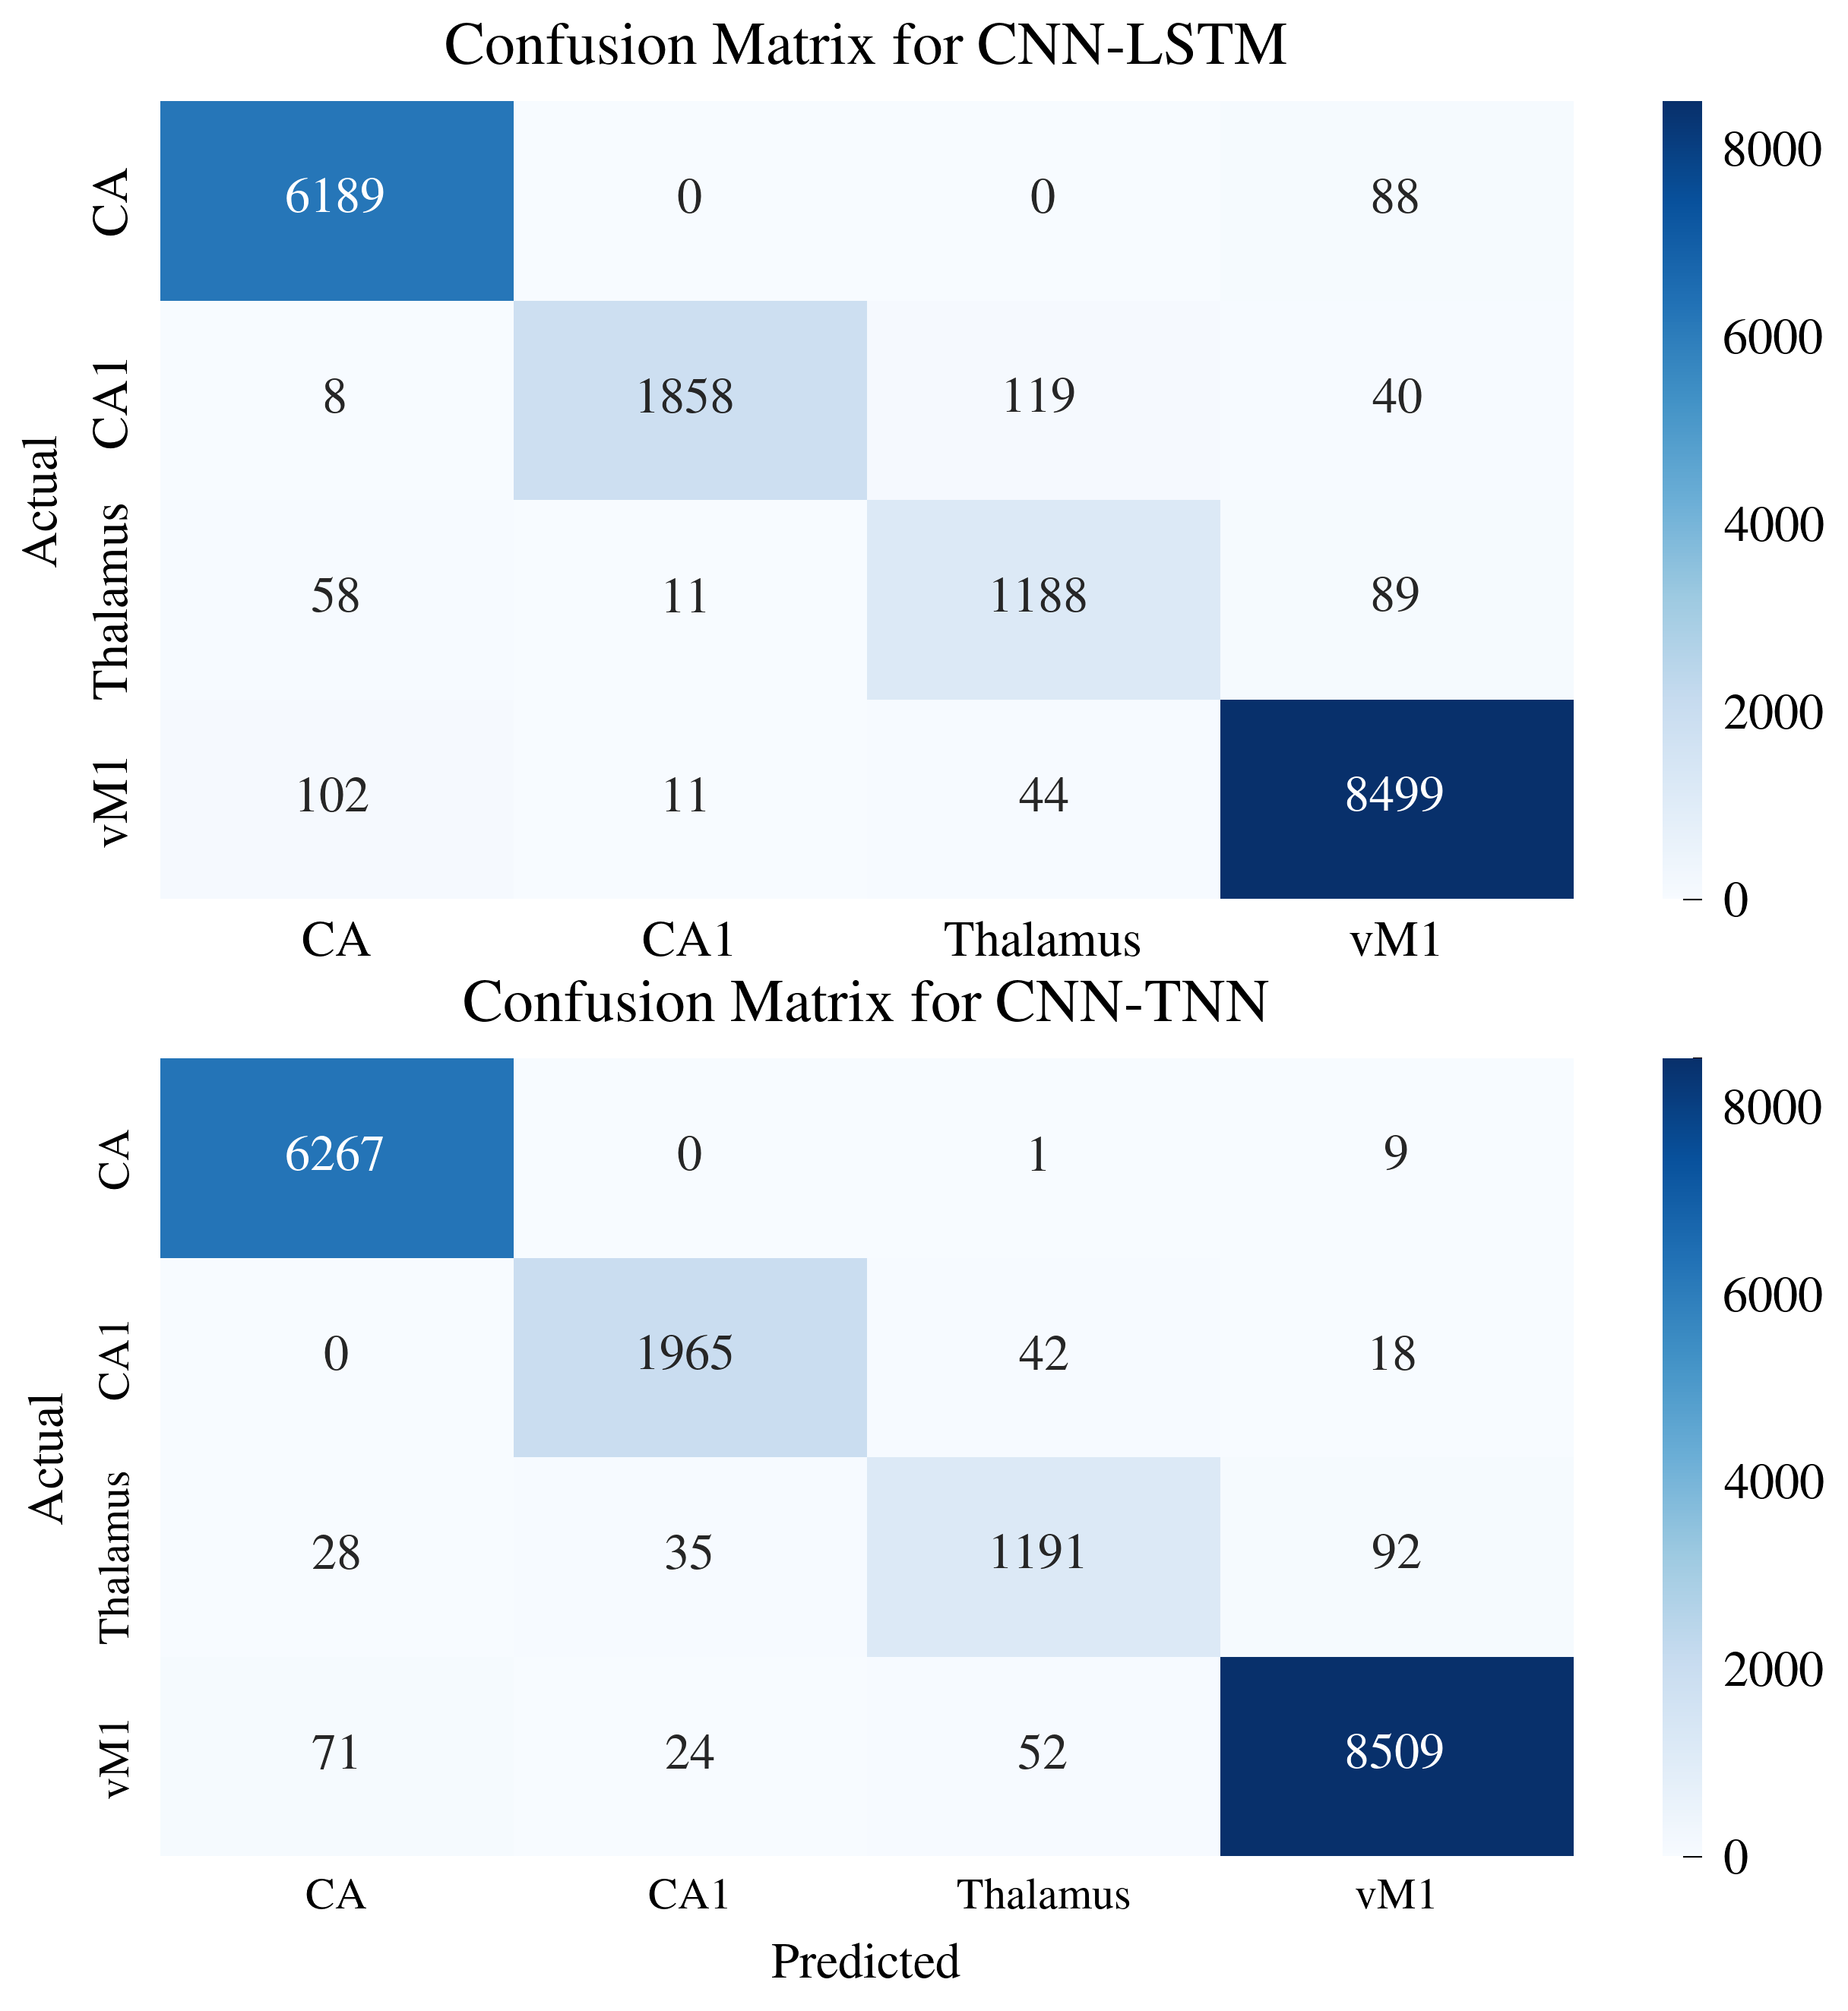

In [69]:
# Ensure proper alignment of columns by manually specifying the correct number of columns and correct column names
# Rename the columns for better plotting
import numpy as np
conf_matrix_cnn_lstm = confusion_matrix_P_CNN_LSTM.rename(columns={"Unnamed: 0": "Actual"})
conf_matrix_cnn_tnn = confusion_matrix_CNN_TNN.rename(columns={"Unnamed: 0": "Actual"})


# Rename the columns for better plotting
conf_matrix_cnn_lstm = conf_matrix_cnn_lstm.rename(columns={"Unnamed: 0": "Actual"})
conf_matrix_cnn_tnn = conf_matrix_cnn_tnn.rename(columns={"Unnamed: 0": "Actual"})

# Plot the confusion matrices in vertical subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5,5))

# CNN-LSTM confusion matrix
sns.heatmap(
    conf_matrix_cnn_lstm.set_index("Actual"),
    annot=True, fmt=".0f", cmap="Blues", ax=ax1
)
ax1.set_title("Confusion Matrix for CNN-LSTM")
ax2.set_xlabel('Predicted')
ax1.set_ylabel('Actual')

# CNN-TNN confusion matrix
sns.heatmap(
    conf_matrix_cnn_tnn.set_index("Actual"),
    annot=True, fmt=".0f", cmap="Blues", ax=ax2
)
ax2.set_title("Confusion Matrix for CNN-TNN")
ax2.set_xlabel('Predicted')
ax2.set_ylabel('Actual')
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)

plt.savefig('../plots/results/confusion_matrix_hybrid.png')
